In [110]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# The first step in Exploratory Data Analysis (EDA) is to understand the dataset. This helps in knowing the structure, content, and quality of the data before performing any analysis or modeling.

# 🔹 Key Aspects of Understanding the Dataset
# 1️⃣ Load the dataset (pd.read_csv())
# 2️⃣ Check the shape (df.shape)
# 3️⃣ Check column names (df.columns)
# 4️⃣ Identify data types (df.dtypes)
# 5️⃣ Check for missing values (df.isnull().sum())
# 6️⃣ Check for duplicates (df.duplicated().sum())
# 7️⃣ Get summary statistics (df.describe())
# 8️⃣ Check unique values (df['col'].unique())
# 9️⃣ Check data balance (for classification) (df['target'].value_counts())



In [112]:
lux_data = pd.read_csv('luxury_housing_bangalore.csv')
print("Loaded successfully.")

Loaded successfully.


In [113]:
lux_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [114]:
# Unit_Size_Sqft = 505 rows are in negative and 10046 missing values - removed 505 row and the NAN values filled with median
# Ticket_Price_Cr = 5 rows are in negative and 10019 missing values - 5 rows removed and the NAN values filled with median
# Amenity Score = 10090 are missing values - Dealt
# Buyers_Comment = 18287 missing values - Leaving as is
# Micro market name changes = Done
# DUp in Property_ID - Removed

In [115]:
lux_data.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [116]:
lux_data['Property_ID'].duplicated().sum()


1000

In [117]:
dup_rows = lux_data[lux_data.duplicated(subset=['Property_ID'], keep=False)]
dup_rows.sort_values('Property_ID').head(10)


,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
50,PROP000051,BELLARY ROAD,Project_50,Total Environment,7385.0,4BHK,8.740334802478952,Primary,HNI,2024-09-30,4.039299,6.756185,Launch,Online,yes,5.314061,34,Will buy after possession.
100725,PROP000051,BELLARY ROAD,Project_50,Total Environment,7385.0,4BHK,8.740334802478952,Primary,HNI,2024-09-30,4.039299,6.756185,Launch,Online,yes,5.314061,34,Will buy after possession.
150,PROP000151,rajajinagar,Project_150,L&T Realty,8678.0,5bhk+,9.321530635745795,Secondary,NRI,2024-12-31,5.638561,5.211055,Launch,Direct,no,5.428077,58,Underpriced for location.
100535,PROP000151,rajajinagar,Project_150,L&T Realty,8678.0,5bhk+,9.321530635745795,Secondary,NRI,2024-12-31,5.638561,5.211055,Launch,Direct,no,5.428077,58,Underpriced for location.
156,PROP000157,Sarjapur Road,Project_156,Sobha,3061.0,5bhk+,16.388946836894448,Primary,HNI,2024-09-30,8.327390,7.945176,Under construction,Online,no,6.626038,79,NaN
100209,PROP000157,Sarjapur Road,Project_156,Sobha,3061.0,5bhk+,16.388946836894448,Primary,HNI,2024-09-30,8.327390,7.945176,Under construction,Online,no,6.626038,79,NaN
100704,PROP000233,Mg Road,Project_232,SNN Raj,7640.0,3Bhk,₹12.47 Cr,Secondary,HNI,2023-09-30,4.279519,NaN,Ready to move,Online,yes,7.673679,73,Too far from my office.
232,PROP000233,Mg Road,Project_232,SNN Raj,7640.0,3Bhk,₹12.47 Cr,Secondary,HNI,2023-09-30,4.279519,NaN,Ready to move,Online,yes,7.673679,73,Too far from my office.
324,PROP000325,JAYANAGAR,Project_324,Sobha,4648.0,3Bhk,NaN,Secondary,Startup Founder,2023-12-31,8.252147,7.425450,Launch,NRI Desk,yes,7.080385,34,Great value for money.
100518,PROP000325,JAYANAGAR,Project_324,Sobha,4648.0,3Bhk,NaN,Secondary,Startup Founder,2023-12-31,8.252147,7.425450,Launch,NRI Desk,yes,7.080385,34,Great value for money.


In [118]:
lux_data = lux_data.drop_duplicates(subset=['Property_ID'], keep='first')


In [119]:
print(len(lux_data))
lux_data['Property_ID'].duplicated().sum()


100000


0

In [120]:
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Display all rows in the DataFrame

In [121]:
lux_data['Micro_Market'].unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'bellary road', 'Koramangala', 'YELAHANKA', 'whitefield',
       'sarjapur road', 'JP NAGAR', 'Rajajinagar', 'koramangala',
       'WHITEFIELD', 'indiranagar', 'jayanagar', 'Whitefield', 'DOMLUR',
       'yelahanka', 'Mg Road', 'HENNUR ROAD', 'Jayanagar', 'Domlur',
       'Electronic City', 'Hebbal', 'mg road', 'jp nagar',
       'BANNERGHATTA ROAD', 'MG ROAD', 'KANAKAPURA ROAD', 'HEBBAL',
       'BELLARY ROAD', 'electronic city', 'ELECTRONIC CITY',
       'Bellary Road', 'Hennur Road', 'rajajinagar', 'Kanakapura Road',
       'INDIRANAGAR', 'hennur road', 'kanakapura road', 'domlur',
       'bannerghatta road', 'RAJAJINAGAR', 'hebbal', 'Yelahanka',
       'SARJAPUR ROAD', 'KORAMANGALA', 'Jp Nagar', 'JAYANAGAR'],
      dtype=object)

In [122]:
lux_data['Micro_Market'] = (
    lux_data['Micro_Market']
    .str.strip()
    .str.title()
    .str.replace('Mg Road', 'MG Road', regex=False)
    .str.replace('Jp Nagar', 'JP Nagar', regex=False)
)
lux_data['Micro_Market'].unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'Bellary Road', 'Koramangala', 'Yelahanka', 'Whitefield',
       'JP Nagar', 'Rajajinagar', 'Jayanagar', 'Domlur', 'MG Road',
       'Hennur Road', 'Electronic City', 'Hebbal', 'Kanakapura Road'],
      dtype=object)

In [123]:
lux_data['Developer_Name'].unique()

array(['RMZ', 'Puravankara', 'Tata Housing', 'Embassy', 'SNN Raj',
       'Brigade', 'Prestige', 'Total Environment', 'Godrej', 'L&T Realty',
       'Sobha'], dtype=object)

##Leaving the Developer name as is because there is no irregularities

In [124]:
lux_data['Configuration'].unique() #needs to be change as some are capitalize and some are not

array(['4bhk', '3Bhk', '3BHK', '4Bhk', '5BHK+', '4BHK', '5bhk+', '5Bhk+',
       '3bhk'], dtype=object)

In [125]:
lux_data['Configuration'] = (
    lux_data['Configuration']
    .str.strip()
    .str.upper()
    .str.replace('BHK', ' BHK', regex=False)
    .str.replace('  ', ' ', regex=False)
)
lux_data['Configuration'].unique()

array(['4 BHK', '3 BHK', '5 BHK+'], dtype=object)

In [126]:
lux_data['Configuration'].isna().sum()

0

In [127]:
lux_data['Ticket_Price_Cr'].unique()# need to convert to float

array(['12.750846039118798', '16.292151871065954', '10.517724412961911',
       ..., '13.730178633219271', '10.363988981166342',
       '10.415616832095246'], dtype=object)

In [128]:
lux_data['Transaction_Type'].unique()

array(['Primary', 'Secondary'], dtype=object)

In [129]:


# Create Booking_Flag as per mentor instruction
lux_data['Booking_Flag'] = lux_data['Transaction_Type'].map(
    {'Primary': 1, 'Secondary': 0}
)


In [130]:
lux_data[['Transaction_Type', 'Booking_Flag']].value_counts()


Transaction_Type  Booking_Flag
Primary           1               50013
Secondary         0               49987
Name: count, dtype: int64

In [131]:
lux_data['Buyer_Type'].unique()

array(['NRI', 'Other', 'HNI', 'CXO', 'Startup Founder'], dtype=object)

In [132]:
lux_data['Purchase_Quarter'].unique()

array(['2025-03-31', '2024-06-30', '2023-12-31', '2024-03-31',
       '2024-12-31', '2023-09-30', '2024-09-30', '2023-06-30'],
      dtype=object)

In [133]:
lux_data['Purchase_Quarter'] = pd.to_datetime(lux_data['Purchase_Quarter'])
lux_data['Quarter_Number'] = lux_data['Purchase_Quarter'].dt.quarter
lux_data['Year'] = lux_data['Purchase_Quarter'].dt.year


In [134]:
lux_data['Connectivity_Score'].unique()

array([7.99009059, 4.83902377, 8.13131488, ..., 6.19334714, 9.43564628,
       5.78629175])

In [135]:
lux_data['Amenity_Score'].unique()

array([5.46286299,        nan, 8.66922724, ..., 7.48247301, 6.36927632,
       5.28402643])

In [136]:
lux_data['Buyer_Comments'].unique()

array(['Loved the amenities!', nan, 'Agent was not responsive.',
       'Excellent location!', 'Too far from my office.',
       'Underpriced for location.', 'Will buy after possession.',
       'Great value for money.', 'Connectivity is poor.',
       'Great view from 15th floor.'], dtype=object)

In [137]:
lux_data['Ticket_Price_Cr'].unique()  #[:600]

array(['12.750846039118798', '16.292151871065954', '10.517724412961911',
       ..., '13.730178633219271', '10.363988981166342',
       '10.415616832095246'], dtype=object)

In [138]:
#remmovig the special chars from column like Rs, Cr or rupee sign

lux_data['Ticket_Price_Cr'] = (
    lux_data['Ticket_Price_Cr']
    .astype(str)
    .str.replace('â‚¹', '', regex=False)   
    .str.replace('₹', '', regex=False)
    .str.replace('Cr', '', regex=False)
    .str.replace('cr', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace('', np.nan)                  
    .astype(float)
    .round(3)
)


In [139]:
#checking how many null vaues 
lux_data['Ticket_Price_Cr'].isna().sum()

9913

In [140]:
lux_data['Ticket_Price_Cr'].describe()


count    90087.000000
mean        12.719069
std          7.670382
min         -1.420000
25%         10.011000
50%         12.038000
75%         14.097000
max        100.000000
Name: Ticket_Price_Cr, dtype: float64

In [141]:
len(lux_data)

100000

In [142]:
# checking teh negative values

lux_data[lux_data['Ticket_Price_Cr'] < 0]

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Booking_Flag,Quarter_Number,Year
3645,PROP003646,Indiranagar,Project_145,Embassy,5092.0,4 BHK,-0.392,Primary,Startup Founder,2024-06-30,7.149634,6.123946,Under construction,Direct,no,6.967136,105,Too far from my office.,1,2,2024
6130,PROP006131,Hennur Road,Project_130,RMZ,4019.0,5 BHK+,-1.420,Primary,Startup Founder,2023-06-30,6.344294,6.345932,Launch,Direct,no,5.137908,40,Underpriced for location.,1,2,2023
39358,PROP039359,Hebbal,Project_358,Tata Housing,4924.0,5 BHK+,-0.287,Primary,NRI,2023-09-30,4.167448,NaN,Ready to move,NRI Desk,yes,8.249373,115,NaN,1,3,2023
50185,PROP050186,JP Nagar,Project_185,Godrej,5807.0,5 BHK+,-0.194,Primary,CXO,2024-12-31,5.707500,9.986799,Launch,Broker,no,7.867063,73,Excellent location!,1,4,2024
83801,PROP083802,Hebbal,Project_301,Tata Housing,6548.0,3 BHK,-0.519,Primary,HNI,2025-03-31,9.180127,7.053654,Under construction,Broker,no,8.870240,87,Great view from 15th floor.,1,1,2025


In [143]:
# #Removieing negative values and keeping NAN values as is

lux_data = lux_data.loc[
    (lux_data['Ticket_Price_Cr'].isna()) | (lux_data['Ticket_Price_Cr'] >= 0)
].reset_index(drop=True)

In [144]:
lux_data['Ticket_Price_Cr'].describe()

count    90082.000000
mean        12.719806
std          7.669956
min          0.660000
25%         10.012000
50%         12.039000
75%         14.097000
max        100.000000
Name: Ticket_Price_Cr, dtype: float64

In [145]:
lux_data['Ticket_Price_Cr'].isna().sum()

9913

In [146]:
# Filling the missing values with median
lux_data['Ticket_Price_Cr'] = lux_data['Ticket_Price_Cr'].fillna(
    lux_data['Ticket_Price_Cr'].median()
)

In [147]:
len(lux_data)

99995

In [148]:
lux_data['Ticket_Price_Cr'].isna().sum()

0

In [149]:
lux_data['Ticket_Price_Cr'].describe()


count    99995.000000
mean        12.652314
std          7.282694
min          0.660000
25%         10.265000
50%         12.039000
75%         13.833000
max        100.000000
Name: Ticket_Price_Cr, dtype: float64

In [150]:
def filin_mis_median(df, column_name):

    df[column_name] = df[column_name].fillna(df[column_name].median())
    return df

In [151]:
# Filing the missing values with median for 'Amenity_Score'
lux_data = filin_mis_median(lux_data, 'Amenity_Score')

In [152]:
lux_data['Amenity_Score'].isna().sum()

0

In [153]:
lux_data['Unit_Size_Sqft'].isna().sum()

9957

In [154]:
lux_data['Unit_Size_Sqft'].describe()

count    90038.000000
mean      5972.078711
std       1783.256738
min         -1.000000
25%       4478.000000
50%       5990.000000
75%       7497.000000
max       8999.000000
Name: Unit_Size_Sqft, dtype: float64

In [155]:
(lux_data['Unit_Size_Sqft'] < 0).sum()


500

In [156]:
# removing negative values and keeping NAN values as is
lux_data = lux_data.loc[
    (lux_data['Unit_Size_Sqft'].isna()) | (lux_data['Unit_Size_Sqft'] >= 0)
].reset_index(drop=True)

In [157]:
lux_data.head(2)

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Booking_Flag,Quarter_Number,Year
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4 BHK,12.751,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!,1,1,2025
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3 BHK,16.292,Primary,Other,2024-06-30,4.839024,7.499789,Under construction,NRI Desk,no,7.723898,106,NaN,1,2,2024


In [158]:
# Missing values are filled using median for Unit_Size_Sqft

lux_data = filin_mis_median(lux_data,'Unit_Size_Sqft')

In [159]:
lux_data.isnull().sum()

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft              0
Configuration               0
Ticket_Price_Cr             0
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score               0
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18019
Booking_Flag                0
Quarter_Number              0
Year                        0
dtype: int64

In [160]:
lux_data['Unit_Size_Sqft'].describe()

count    99495.000000
mean      6005.340263
std       1642.390143
min       3000.000000
25%       4676.000000
50%       6004.500000
75%       7339.000000
max       8999.000000
Name: Unit_Size_Sqft, dtype: float64

In [161]:
len(lux_data)

99495

In [162]:
lux_data.index.min(), lux_data.index.max()

(0, 99494)

In [163]:

lux_data.reset_index(drop=True, inplace=True)

In [164]:
lux_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99495 entries, 0 to 99494
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Property_ID           99495 non-null  object        
 1   Micro_Market          99495 non-null  object        
 2   Project_Name          99495 non-null  object        
 3   Developer_Name        99495 non-null  object        
 4   Unit_Size_Sqft        99495 non-null  float64       
 5   Configuration         99495 non-null  object        
 6   Ticket_Price_Cr       99495 non-null  float64       
 7   Transaction_Type      99495 non-null  object        
 8   Buyer_Type            99495 non-null  object        
 9   Purchase_Quarter      99495 non-null  datetime64[ns]
 10  Connectivity_Score    99495 non-null  float64       
 11  Amenity_Score         99495 non-null  float64       
 12  Possession_Status     99495 non-null  object        
 13  Sales_Channel   

In [165]:
lux_data.isnull().sum()

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft              0
Configuration               0
Ticket_Price_Cr             0
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score               0
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18019
Booking_Flag                0
Quarter_Number              0
Year                        0
dtype: int64

In [166]:
lux_data.duplicated().sum()

0

In [167]:
# 
lux_data['Property_ID'].duplicated().sum()

0

In [168]:
lux_data['Connectivity_Score'].isna().sum()

0

In [169]:
lux_data.describe()

,Unit_Size_Sqft,Ticket_Price_Cr,Purchase_Quarter,Connectivity_Score,Amenity_Score,Locality_Infra_Score,Avg_Traffic_Time_Min,Booking_Flag,Quarter_Number,Year
count,99495.000000,99495.000000,99495,99495.000000,99495.000000,99495.000000,99495.000000,99495.000000,99495.000000,99495.000000
mean,6005.340263,12.652370,2024-05-15 06:59:55.332428544,6.993031,7.503305,7.499346,67.182763,0.500116,2.497291,2023.749766
min,3000.000000,0.660000,2023-06-30 00:00:00,4.000031,5.000224,5.000013,15.000000,0.000000,1.000000,2023.000000
25%,4676.000000,10.265000,2023-09-30 00:00:00,5.494659,6.395204,6.248800,41.000000,0.000000,1.000000,2023.000000
50%,6004.500000,12.039000,2024-03-31 00:00:00,6.986644,7.499789,7.496954,67.000000,1.000000,2.000000,2024.000000
75%,7339.000000,13.833000,2024-09-30 00:00:00,8.491010,8.615229,8.752210,93.000000,1.000000,3.000000,2024.000000
max,8999.000000,100.000000,2025-03-31 00:00:00,9.999970,9.999865,9.999956,119.000000,1.000000,4.000000,2025.000000
std,1642.390143,7.282978,NaN,1.731785,1.366766,1.443477,30.262168,0.500002,1.117258,0.660284


In [170]:
# The Ticket_Price_Cr is showing very values after after 3rd Quartile. 
# The Data is right skewed as the mean is greater than median.

### Data is Clean till Now

## Univariate Analysis

I studied the ticket prices using summary statistics and graphs. The prices are not evenly distributed because a few homes are very expensive. This is expected in luxury real estate. So, I used the median price for analysis and did not remove high-price values, as they represent real luxury properties.

In [171]:
lux_data['Ticket_Price_Cr'].isna().sum()
# as there is no missing values after cleaning

0

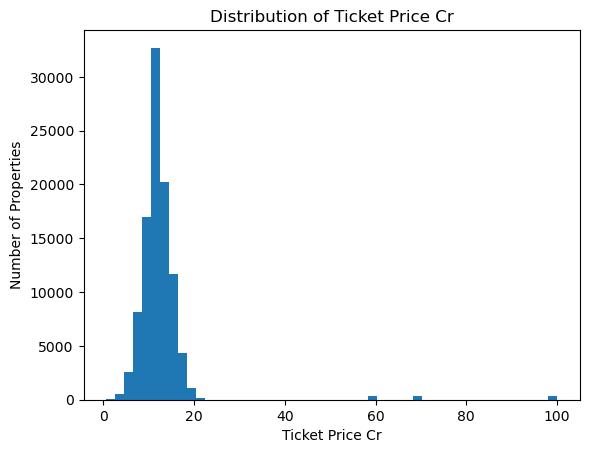

In [172]:
# histogram 
plt.figure()
plt.hist(lux_data['Ticket_Price_Cr'].dropna(), bins=50)
plt.xlabel('Ticket Price Cr')
plt.ylabel('Number of Properties')
plt.title('Distribution of Ticket Price Cr')
plt.show()


<Axes: xlabel='Ticket_Price_Cr', ylabel='Count'>

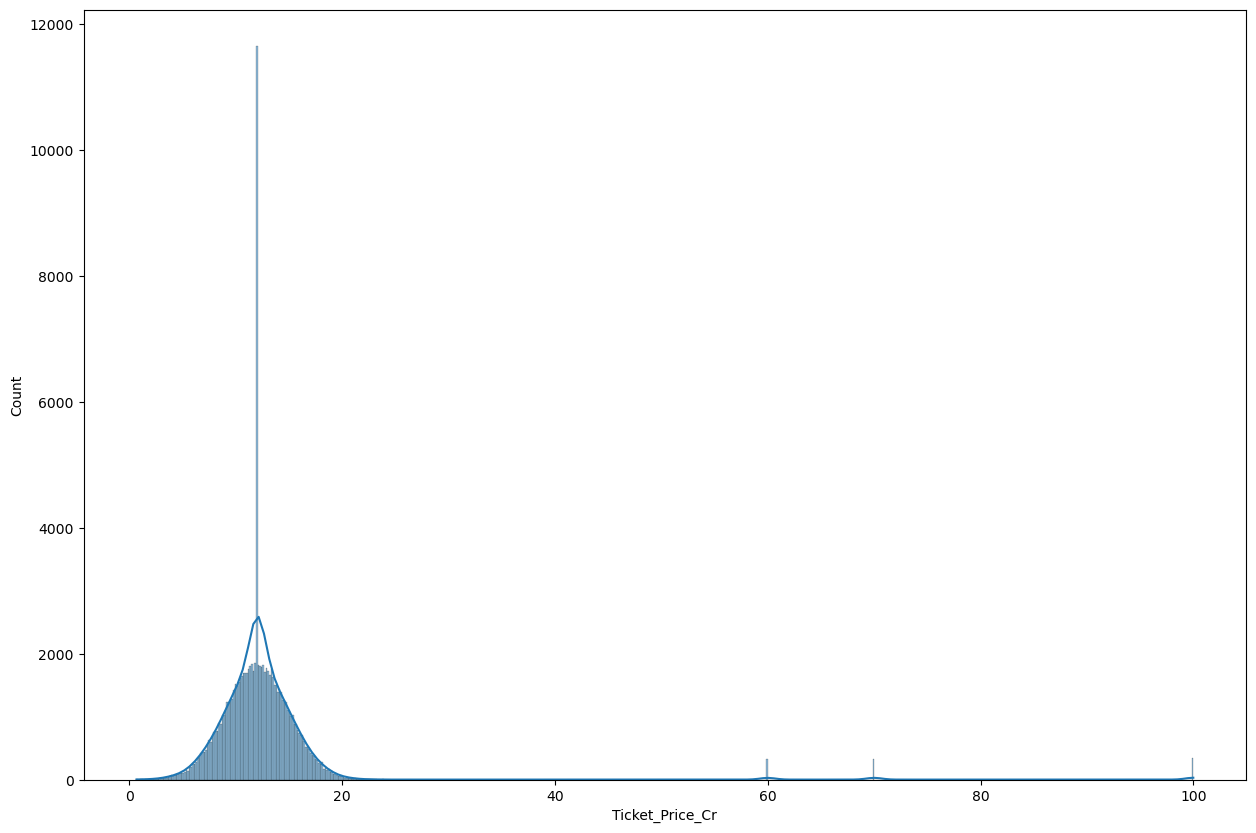

In [173]:
plt.figure(figsize=(15,10))
sns.histplot(x='Ticket_Price_Cr', data=lux_data, kde=True)

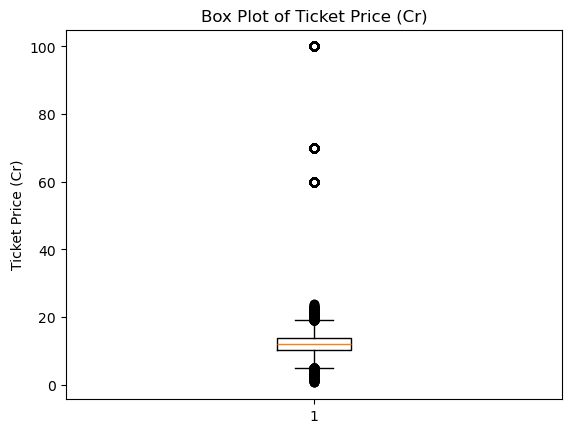

In [174]:
# Box plot

plt.figure()
plt.boxplot(lux_data['Ticket_Price_Cr'].dropna())
plt.ylabel('Ticket Price (Cr)')
plt.title('Box Plot of Ticket Price (Cr)')
plt.show()


Text(0.5, 1.0, 'Box Plot of Ticket Price (Cr)')

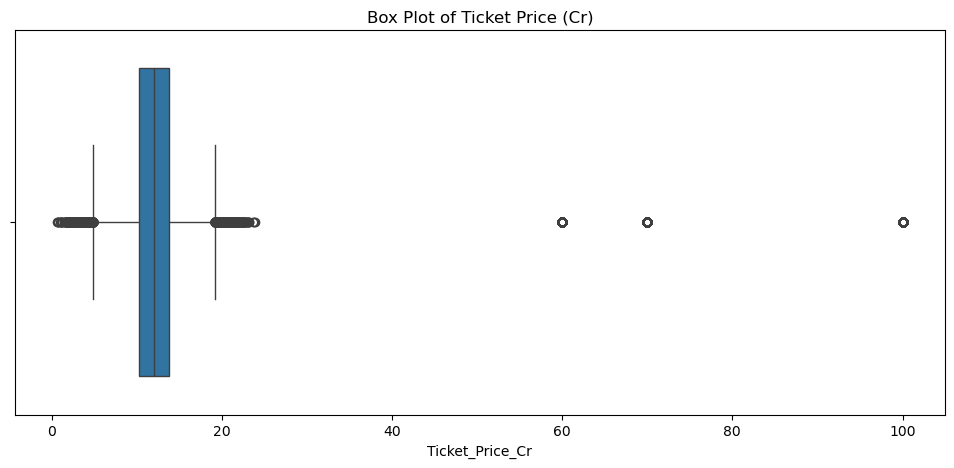

In [175]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Ticket_Price_Cr', data=lux_data)
plt.title('Box Plot of Ticket Price (Cr)')


Text(0.5, 1.0, 'Box Plot of Ticket Price (Cr)')

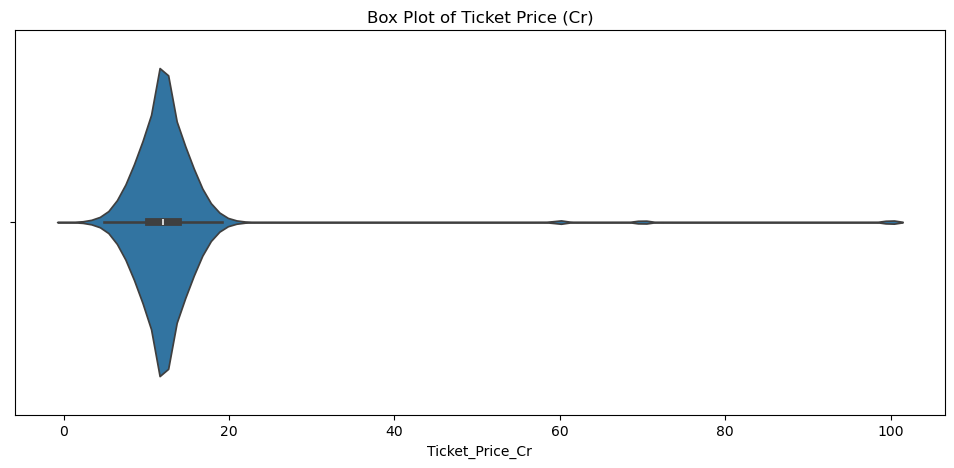

In [176]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Ticket_Price_Cr', data=lux_data)
plt.title('Box Plot of Ticket Price (Cr)')


The box plot shows many outliers because luxury housing prices are right-skewed. A small number of very expensive properties lie far from the median, so they are flagged as outliers statistically, but they are valid business cases.

In [177]:
lux_data['Ticket_Price_Cr'].skew()


8.478342731652114

Many outliers appear because most luxury homes are priced in a similar range, while a small number of properties are extremely expensive. These high prices are real luxury properties, not data errors

In [178]:
lux_threshold = lux_data['Ticket_Price_Cr'].quantile(0.75)
lux_threshold


13.833

In [179]:
lux_data['Luxury_Segment'] = np.where(
    lux_data['Ticket_Price_Cr'] > lux_threshold,
    'Ultra Luxury',
    'Luxury'
)

In [180]:
lux_data['Luxury_Segment'].value_counts()

Luxury_Segment
Luxury          74630
Ultra Luxury    24865
Name: count, dtype: int64

In [181]:
lux_data.groupby('Luxury_Segment')['Ticket_Price_Cr'].describe()


,count,mean,std,min,25%,50%,75%,max
Luxury_Segment,,,,,,,,
Luxury,74630.0,10.830372,2.056934,0.660,9.60,11.400,12.149,13.833
Ultra Luxury,24865.0,18.120931,12.636395,13.834,14.52,15.378,16.666,100.000


In [182]:
# Because ticket prices were highly skewed, 
# I divided properties into Luxury and Ultra-Luxury categories using the 75th percentile of price. 
# This helped me treat very expensive homes as a separate business segment instead of calling them outliers.

# Bi-Variate Analysis

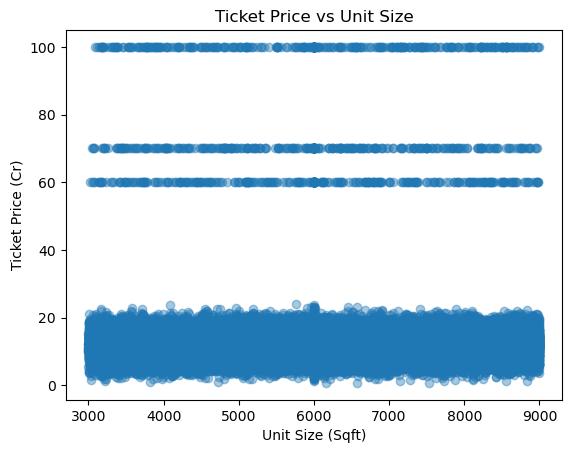

In [183]:
# Scatter Plot
plt.figure()  
plt.scatter(
    lux_data['Unit_Size_Sqft'],
    lux_data['Ticket_Price_Cr'],
    alpha=0.4
)
plt.xlabel('Unit Size (Sqft)')
plt.ylabel('Ticket Price (Cr)')
plt.title('Ticket Price vs Unit Size')
plt.show()

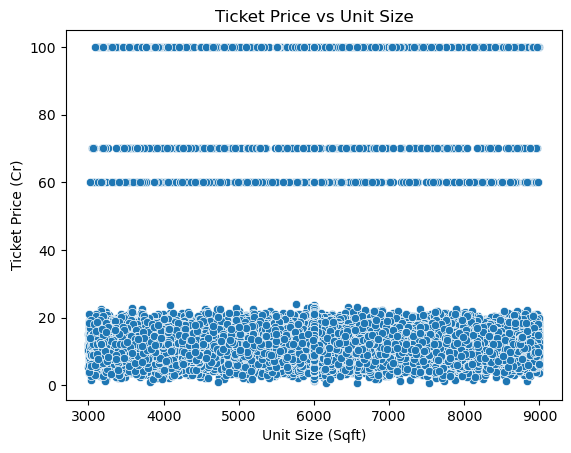

In [184]:
sns.scatterplot(data=lux_data,
               x='Unit_Size_Sqft',
               y='Ticket_Price_Cr')
plt.xlabel('Unit Size (Sqft)')
plt.ylabel('Ticket Price (Cr)')
plt.title('Ticket Price vs Unit Size')
plt.show()

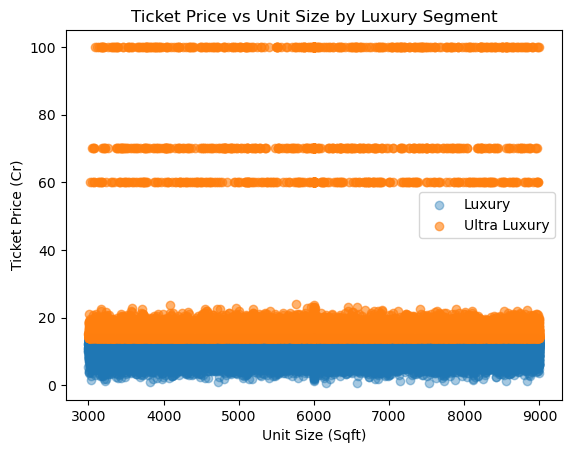

In [185]:
plt.figure()

luxury = lux_data[lux_data['Luxury_Segment'] == 'Luxury']
ultra = lux_data[lux_data['Luxury_Segment'] == 'Ultra Luxury']

plt.scatter(
    luxury['Unit_Size_Sqft'],
    luxury['Ticket_Price_Cr'],
    alpha=0.4,
    label='Luxury'
)

plt.scatter(
    ultra['Unit_Size_Sqft'],
    ultra['Ticket_Price_Cr'],
    alpha=0.6,
    label='Ultra Luxury'
)

plt.xlabel('Unit Size (Sqft)')
plt.ylabel('Ticket Price (Cr)')
plt.title('Ticket Price vs Unit Size by Luxury Segment')
plt.legend()
plt.show()


In [186]:
lux_data[['Unit_Size_Sqft', 'Ticket_Price_Cr']].corr()


,Unit_Size_Sqft,Ticket_Price_Cr
Unit_Size_Sqft,1.000000,0.001672
Ticket_Price_Cr,0.001672,1.000000


In [187]:
lux_data.groupby('Luxury_Segment')[['Unit_Size_Sqft', 'Ticket_Price_Cr']].corr()


Unit_Size_Sqft  Ticket_Price_Cr
Luxury_Segment                                                 
Luxury         Unit_Size_Sqft         1.000000         0.001482
               Ticket_Price_Cr        0.001482         1.000000
Ultra Luxury   Unit_Size_Sqft         1.000000         0.005045
               Ticket_Price_Cr        0.005045         1.000000

In [188]:
lux_data['Price_per_Sqft'] = lux_data['Ticket_Price_Cr'] / lux_data['Unit_Size_Sqft']


In [189]:
# The amount is showing in crores
lux_data['Price_per_Sqft'].describe()


count    99495.000000
mean         0.002293
std          0.001545
min          0.000100
25%          0.001562
50%          0.002005
75%          0.002656
max          0.032436
Name: Price_per_Sqft, dtype: float64

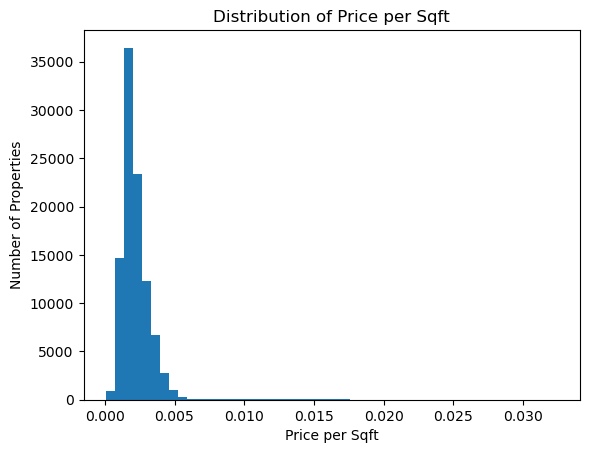

In [190]:
# Histogram

plt.figure()
plt.hist(lux_data['Price_per_Sqft'].dropna(), bins=50)
plt.xlabel('Price per Sqft')
plt.ylabel('Number of Properties')
plt.title('Distribution of Price per Sqft')
plt.show()


In [191]:
lux_data.groupby('Luxury_Segment')['Price_per_Sqft'].describe()


,count,mean,std,min,25%,50%,75%,max
Luxury_Segment,,,,,,,,
Luxury,74630.0,0.001962,0.000724,0.00010,0.001450,0.001816,0.002330,0.004582
Ultra Luxury,24865.0,0.003285,0.002581,0.00154,0.002146,0.002636,0.003536,0.032436


After analyzing the relationship between unit size and ticket price, I created a Price per Sqft feature to normalize prices by size. This helped me compare properties more fairly and understand pricing differences between luxury and ultra-luxury homes

In [192]:
# Now we are going to create a new column to normalise the visibility

lux_data['Price_per_Sqft_INR'] = (
    lux_data['Ticket_Price_Cr'] * 1_00_00_000
 / lux_data['Unit_Size_Sqft']).round(2)

In [193]:
# lux_data.head()

In [194]:
lux_data.groupby('Luxury_Segment')['Price_per_Sqft_INR'].describe()


,count,mean,std,min,25%,50%,75%,max
Luxury_Segment,,,,,,,,
Luxury,74630.0,19621.017516,7241.868614,995.62,14503.2025,18158.51,23300.1425,45818.97
Ultra Luxury,24865.0,32846.622943,25806.502945,15397.95,21464.7700,26363.56,35358.5500,324359.39


<Figure size 640x480 with 0 Axes>

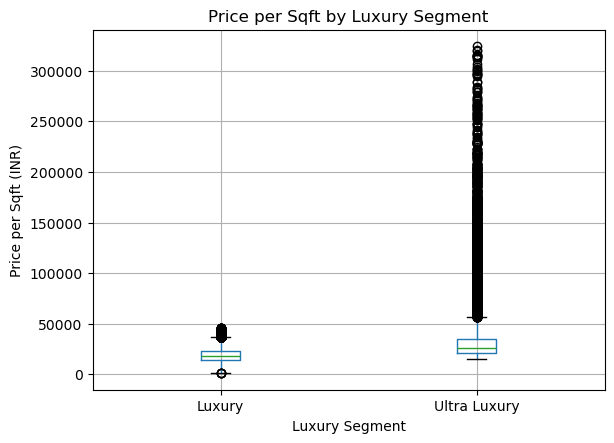

In [195]:
# Histogram


plt.figure()
lux_data.boxplot(
    column='Price_per_Sqft_INR',
    by='Luxury_Segment'
)
plt.xlabel('Luxury Segment')
plt.ylabel('Price per Sqft (INR)')
plt.title('Price per Sqft by Luxury Segment')
plt.suptitle('')
plt.show()


Ultra-luxury properties have a higher price per square foot compared to luxury properties, indicating that their premium is not only due to larger size but also higher per-unit pricing.

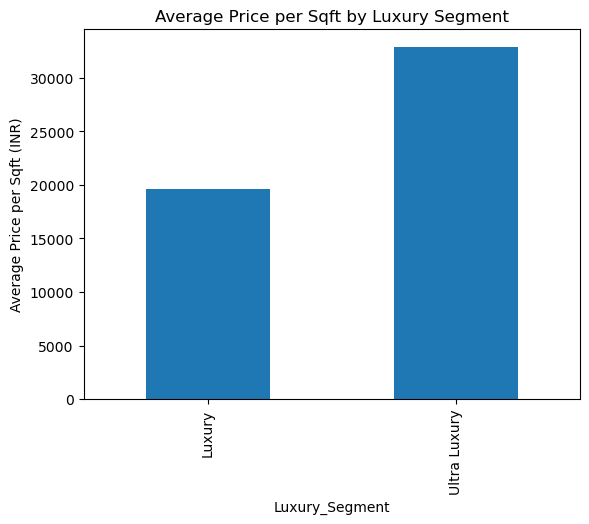

In [196]:
lux_data.groupby('Luxury_Segment')['Price_per_Sqft_INR'].mean().plot(kind='bar')
plt.ylabel('Average Price per Sqft (INR)')
plt.title('Average Price per Sqft by Luxury Segment')
plt.show()


In [197]:
lux_data.groupby('Micro_Market')['Price_per_Sqft_INR'].describe()


,count,mean,std,min,25%,50%,75%,max
Micro_Market,,,,,,,,
Bannerghatta Road,6340.0,22939.852715,15568.256906,1438.73,15592.0325,20049.960,26530.4025,313676.29
Bellary Road,6187.0,22858.487344,15136.381822,2832.41,15665.7850,20049.960,26739.3350,315556.96
Domlur,6156.0,22523.904003,13771.666232,2022.88,15584.9500,19857.005,26003.0950,264760.39
Electronic City,6184.0,22845.470454,15009.514863,1795.79,15646.3375,20045.520,26511.1675,302206.10
Hebbal,6147.0,23077.874033,15455.128288,3700.60,15641.5200,20184.860,26709.7200,283125.71
Hennur Road,6126.0,23257.790059,15972.529454,3002.75,15768.8575,20073.495,27238.5325,314762.35
Indiranagar,6234.0,22748.618046,15783.857246,1397.01,15352.5075,19806.715,26306.5600,296296.30
JP Nagar,6332.0,22811.152213,15153.091867,2785.70,15677.4975,20049.960,26353.7200,313774.71
Jayanagar,6360.0,22895.047025,14758.142274,3847.60,15636.8750,20049.960,26431.4800,247708.69


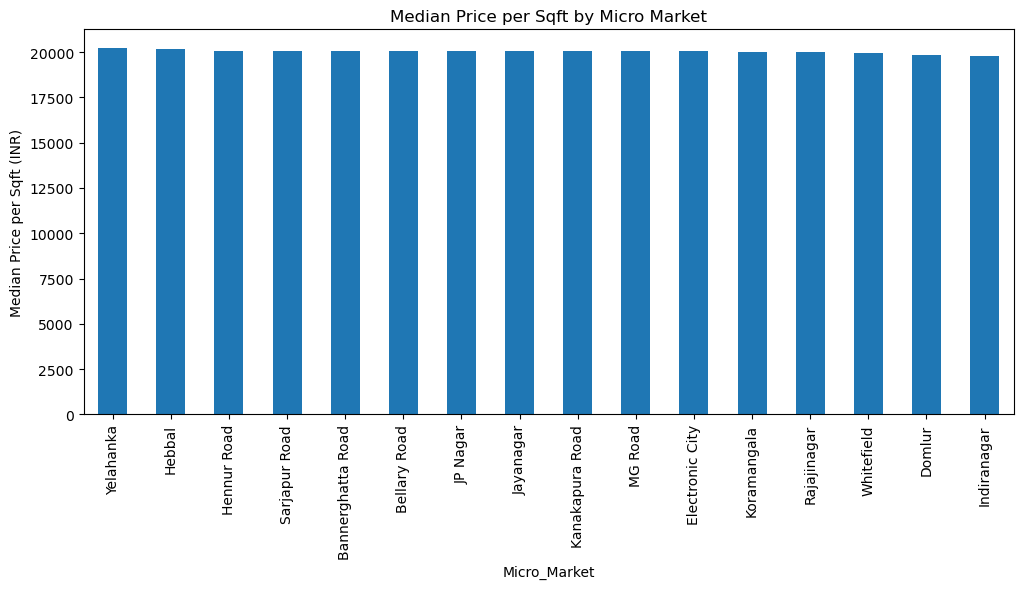

In [198]:
lux_data.groupby('Micro_Market')['Price_per_Sqft_INR'].median().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12, 5)
)
plt.ylabel('Median Price per Sqft (INR)')
plt.title('Median Price per Sqft by Micro Market')
plt.show()


In [199]:
num_cols = [
    'Ticket_Price_Cr',
    'Unit_Size_Sqft',
    'Price_per_Sqft_INR',
    'Amenity_Score',
    'Connectivity_Score',
    'Locality_Infra_Score',
    'Avg_Traffic_Time_Min'
]

In [200]:
corr_matrix = lux_data[num_cols].corr()
corr_matrix


,Ticket_Price_Cr,Unit_Size_Sqft,Price_per_Sqft_INR,Amenity_Score,Connectivity_Score,Locality_Infra_Score,Avg_Traffic_Time_Min
Ticket_Price_Cr,1.000000,0.001672,0.848112,0.001867,0.000506,0.000373,-0.001854
Unit_Size_Sqft,0.001672,1.000000,-0.439795,-0.005042,0.000730,-0.000817,-0.003956
Price_per_Sqft_INR,0.848112,-0.439795,1.000000,0.003406,-0.000169,-0.001114,0.000667
Amenity_Score,0.001867,-0.005042,0.003406,1.000000,-0.003784,0.002864,0.000405
Connectivity_Score,0.000506,0.000730,-0.000169,-0.003784,1.000000,0.000144,-0.000765
Locality_Infra_Score,0.000373,-0.000817,-0.001114,0.002864,0.000144,1.000000,0.004666
Avg_Traffic_Time_Min,-0.001854,-0.003956,0.000667,0.000405,-0.000765,0.004666,1.000000


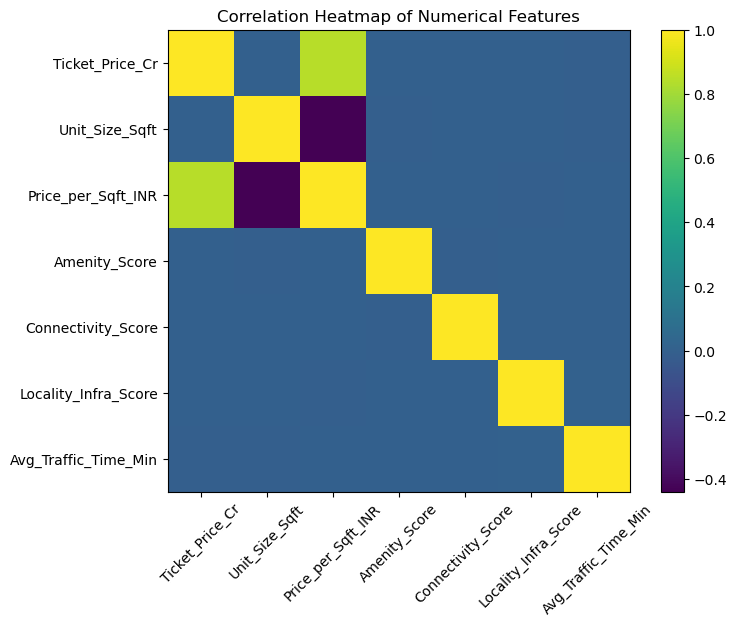

In [201]:
# Correlation analysis
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [202]:
#log transformation to skewed features
lux_data['Log_Ticket_Price_Cr'] = np.log1p(lux_data['Ticket_Price_Cr'])
lux_data['Log_Price_per_Sqft_INR'] = np.log1p(lux_data['Price_per_Sqft_INR'])


In [203]:
lux_data[['Ticket_Price_Cr', 'Log_Ticket_Price_Cr']].describe()
lux_data[['Price_per_Sqft_INR', 'Log_Price_per_Sqft_INR']].describe()


,Price_per_Sqft_INR,Log_Price_per_Sqft_INR
count,99495.000000,99495.000000
mean,22926.255758,9.930659
std,15445.316180,0.433276
min,995.620000,6.904370
25%,15619.250000,9.656323
50%,20049.960000,9.906032
75%,26560.725000,10.187227
max,324359.390000,12.689610


In [204]:
lux_data.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Booking_Flag,Quarter_Number,Year,Luxury_Segment,Price_per_Sqft,Price_per_Sqft_INR,Log_Ticket_Price_Cr,Log_Price_per_Sqft_INR
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4 BHK,12.751,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!,1,1,2025,Luxury,0.003168,31679.50,2.621112,10.363457
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3 BHK,16.292,Primary,Other,2024-06-30,4.839024,7.499789,Under construction,NRI Desk,no,7.723898,106,NaN,1,2,2024,Ultra Luxury,0.002828,28284.72,2.850244,10.250112
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4 BHK,10.518,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.,1,4,2023,Luxury,0.001365,13647.33,2.443911,9.521372
3,PROP000004,Bellary Road,Project_3,Embassy,6192.0,3 BHK,9.396,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!,1,1,2024,Luxury,0.001517,15174.42,2.341421,9.627432
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4 BHK,15.345,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.,0,4,2024,Ultra Luxury,0.002147,21470.55,2.793922,9.974484


In [205]:

final_cols = [
    'Property_ID', 'Project_Name', 'Developer_Name',
    'Micro_Market', 'Locality_Infra_Score', 'Avg_Traffic_Time_Min',
    'Unit_Size_Sqft', 'Configuration', 'Possession_Status',
    'Amenity_Score', 'Connectivity_Score', 'Luxury_Segment',
    'Ticket_Price_Cr', 'Price_per_Sqft_INR',
    'Log_Ticket_Price_Cr', 'Log_Price_per_Sqft_INR',
    'Buyer_Type', 'NRI_Buyer', 'Sales_Channel', 'Transaction_Type',
    'Purchase_Quarter', 'Quarter_Number', 'Year', 'Booking_Flag',
    'Buyer_Comments'
]

lux_data_final = lux_data[final_cols]
lux_data_final.to_csv('luxury_housing_cleaned_v2.csv', index=False)


Not creating Quarter number because Power BI can easily derive it hence leaving as is.

I did not create a Booking_Flag because all records represent completed sales transactions, making the flag redundant.

In [206]:
lux_data_final.head()

,Property_ID,Project_Name,Developer_Name,Micro_Market,Locality_Infra_Score,Avg_Traffic_Time_Min,Unit_Size_Sqft,Configuration,Possession_Status,Amenity_Score,Connectivity_Score,Luxury_Segment,Ticket_Price_Cr,Price_per_Sqft_INR,Log_Ticket_Price_Cr,Log_Price_per_Sqft_INR,Buyer_Type,NRI_Buyer,Sales_Channel,Transaction_Type,Purchase_Quarter,Quarter_Number,Year,Booking_Flag,Buyer_Comments
0,PROP000001,Project_0,RMZ,Sarjapur Road,9.212491,18,4025.0,4 BHK,Launch,5.462863,7.990091,Luxury,12.751,31679.50,2.621112,10.363457,NRI,yes,Broker,Primary,2025-03-31,1,2025,1,Loved the amenities!
1,PROP000002,Project_1,Puravankara,Indiranagar,7.723898,106,5760.0,3 BHK,Under construction,7.499789,4.839024,Ultra Luxury,16.292,28284.72,2.850244,10.250112,Other,no,NRI Desk,Primary,2024-06-30,2,2024,1,NaN
2,PROP000003,Project_2,Tata Housing,Bannerghatta Road,6.985493,113,7707.0,4 BHK,Ready to move,8.669227,8.131315,Luxury,10.518,13647.33,2.443911,9.521372,HNI,yes,Direct,Primary,2023-12-31,4,2023,1,Agent was not responsive.
3,PROP000004,Project_3,Embassy,Bellary Road,6.100929,106,6192.0,3 BHK,Ready to move,5.720246,7.501657,Luxury,9.396,15174.42,2.341421,9.627432,HNI,yes,Online,Primary,2024-03-31,1,2024,1,Excellent location!
4,PROP000005,Project_4,SNN Raj,Koramangala,5.312510,18,7147.0,4 BHK,Under construction,8.609649,4.525216,Ultra Luxury,15.345,21470.55,2.793922,9.974484,HNI,no,Broker,Secondary,2024-12-31,4,2024,0,Too far from my office.


In [207]:
lux_data.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Booking_Flag,Quarter_Number,Year,Luxury_Segment,Price_per_Sqft,Price_per_Sqft_INR,Log_Ticket_Price_Cr,Log_Price_per_Sqft_INR
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4 BHK,12.751,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!,1,1,2025,Luxury,0.003168,31679.50,2.621112,10.363457
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3 BHK,16.292,Primary,Other,2024-06-30,4.839024,7.499789,Under construction,NRI Desk,no,7.723898,106,NaN,1,2,2024,Ultra Luxury,0.002828,28284.72,2.850244,10.250112
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4 BHK,10.518,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.,1,4,2023,Luxury,0.001365,13647.33,2.443911,9.521372
3,PROP000004,Bellary Road,Project_3,Embassy,6192.0,3 BHK,9.396,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!,1,1,2024,Luxury,0.001517,15174.42,2.341421,9.627432
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4 BHK,15.345,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.,0,4,2024,Ultra Luxury,0.002147,21470.55,2.793922,9.974484
